In [2]:
from ContNoRegret.Domains import nBox
from ContNoRegret.LossFunctions import PolynomialLossFunction, AffineLossFunction
from ContNoRegret.DualAveraging import *
import numpy as np
import ctypes
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dom = nBox([(0,1), (0,1)])
Loss = PolynomialLossFunction(dom, [1, 2, 1], [(2,0), (1,1), (0,2)])
Loss.set_bounds([0, 4])
# Loss = AffineLossFunction(dom, (1,1), 0)
# Loss.set_bounds([0, 2])
# potential = CompositeOmegaPotential(gamma=3)
potential = pNormPotential(1.5)
eta = 0.1

In [4]:
nustar(dom, potential, eta, Loss)

-11.131326442316086

In [10]:
gammas = [1.25, 1.5, 1.75, 2, 2.5, 3, 3.5, 4]
nustars = [nustar(dom, CompositeOmegaPotential(gamma), eta, Loss) for gamma in gammas]

In [10]:
ps = np.linspace(1.05, 2, 10)
nustars = [nustar(dom, pNormPotential(p), eta, Loss) for p in ps]

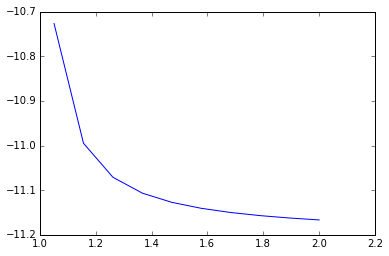

In [11]:
plt.plot(ps, nustars)

In [14]:
import numpy as np
from ContNoRegret.LossFunctions import AffineLossFunction, PolynomialLossFunction, QuadraticLossFunction
from ContNoRegret.Domains import nBox, UnionOfDisjointnBoxes
dom = nBox([(0,1), (0,1), (0,1)])
dom2 = UnionOfDisjointnBoxes([nBox([(-1,0), (-1,0)]), nBox([(0,1), (0,1)])])
loss = AffineLossFunction(dom2, [1,3,5], 1.75)
polyloss = PolynomialLossFunction(dom, [1,2,3], [(1,3,1), (2,1,0)])
quadloss = QuadraticLossFunction(dom, np.array([0.5, 0.5, 0.5]), np.array([[2,0,0],[0,1,0],[0,0,2]]), 0)